# Install the necessary python libraries

In [206]:
import networkx as nx
import numpy as np
import pandas as pd

# Common neighbours

Common neighbors of [3, 6, 9]: [1, 10]


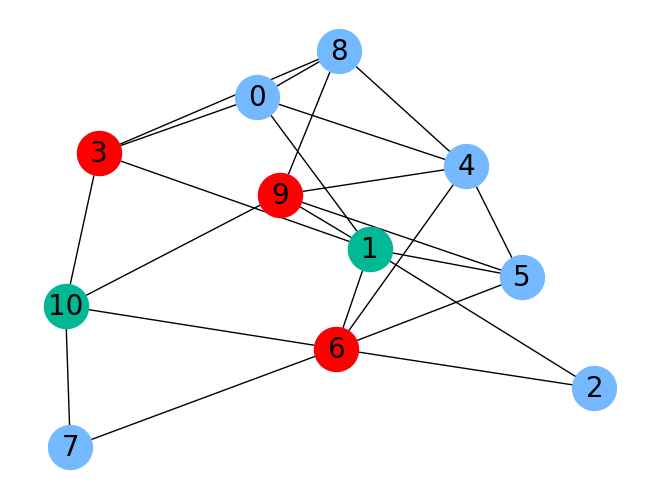

In [207]:
from itertools import combinations

# Function to get common values in two lists
def common_values(a, b):
    return [value for value in a if value in b]

# Function to get list of common neighbors
def get_common_neighbors(G, node_list):
    cn_list = G.nodes
    node_pairs = list(combinations(node_list, 2))
    
    for pair in node_pairs:
        cn_in_node_pair = sorted(nx.common_neighbors(G, pair[0], pair[1]))
        cn_list = common_values(cn_list, cn_in_node_pair)

    return cn_list

# Define graph
G = nx.read_edgelist('./data/edge_list.txt')

# Relabel nodes from string to int
mapping = {f'{i}': i for i in range(11)}
G = nx.relabel_nodes(G, mapping)

# Choose list of nodes to get common neighbors
target_nodes = [3, 6, 9]

# Get list of common neighbors
cn_list = get_common_neighbors(G, target_nodes)

print(f"Common neighbors of {target_nodes}: {cn_list}")

pos = nx.spring_layout(G)
nx.draw(G, pos,
        node_size=1000,
        node_color='#74b9ff',
        with_labels=True,
        font_size = 20)

# Mark common neighbors as green color
nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=cn_list, node_color='#00b894')

# Mark target nodes as red color
nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=target_nodes, node_color='r')

# Jaccard’s coefficient

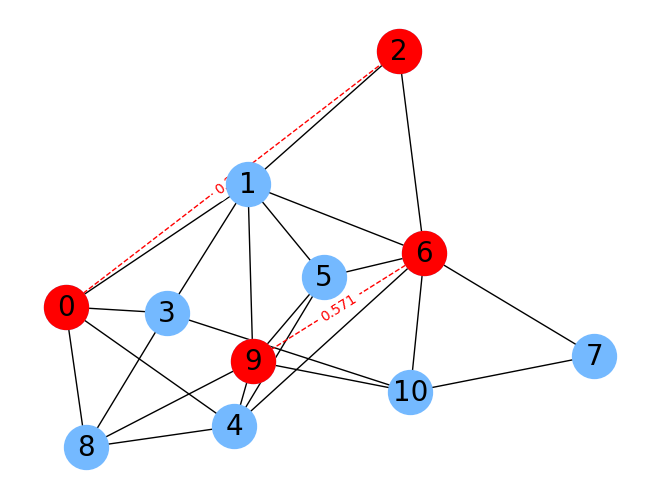

In [208]:
# Draw graph with coefficient edges
def draw_coefficient_edges(G, preds):
    edge_labels = {}
    target_list = []

    for u, v, p in preds:
        edge_labels[(u, v)] = f"{p:.3f}"
        target_list.append(u)
        target_list.append(v)
        
    pos = nx.spring_layout(G)

    nx.draw(G, pos, 
            node_size=1000,
            node_color='#74b9ff',
            with_labels=True,
            font_size = 20)
    # Mark target nodes as green color
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=target_list,
                           node_size=1000,
                           node_color='r')
    nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red'
    )

# Calculate Jaccard’s coefficient of node pairs in a list of nodes
node_list = [(6, 9), (0, 2)]
preds = nx.jaccard_coefficient(G, node_list)
draw_coefficient_edges(G, preds)

#  Adamic-Adar

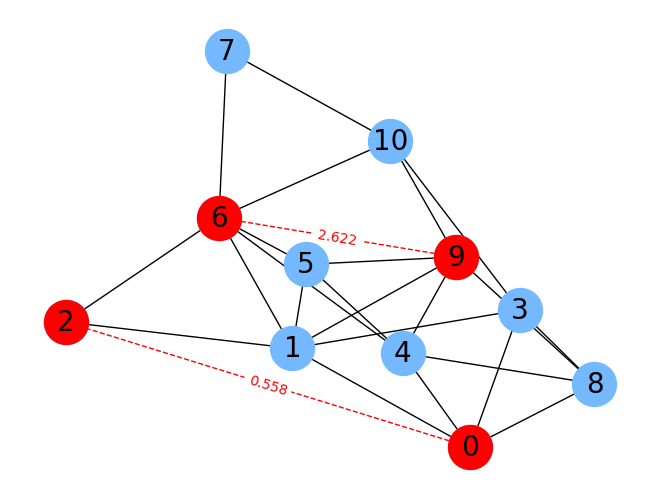

In [209]:
# Function to calculate Adamic-Adar index of node pairs in a list of nodes
def calculate_adamic_adar_index(G, node_list):
    # Check if nodes exist in the graph
    for node_pair in node_list:
        if not all(node in G for node in node_pair):
            print(f"Node pair {node_pair} does not exist in the graph.")
            return
    return list(nx.adamic_adar_index(G, node_list))

# Define node pairs
node_list = [(6, 9), (0, 2)]

# Calculate Adamic-Adar index
preds = calculate_adamic_adar_index(G, node_list)

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Preferential attachment (PA)

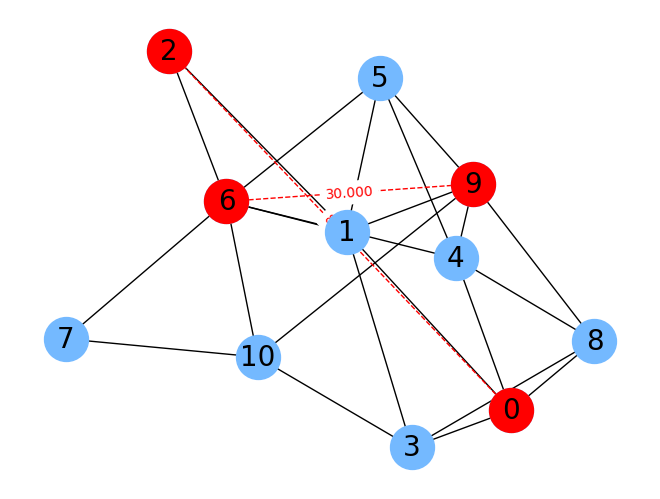

In [210]:
# Function to calculate Preferential Attachment of node pairs in a list of nodes
def calculate_preferential_attachment(G, node_list):
    # Check if nodes exist in the graph
    for node_pair in node_list:
        if not all(node in G for node in node_pair):
            print(f"Node pair {node_pair} does not exist in the graph.")
            return
    return list(nx.preferential_attachment(G, node_list))

# Define node pairs
node_list = [(6, 9), (0, 2)]

# Calculate Preferential Attachment
preds = calculate_preferential_attachment(G, node_list)

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Salton index

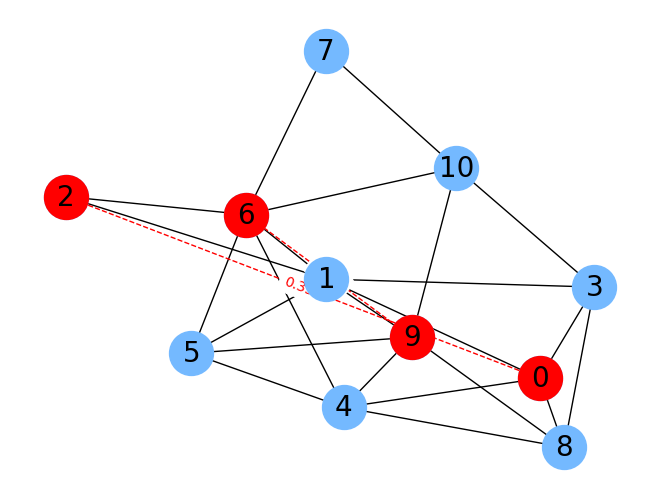

In [211]:
import math

# Function to calculate Salton index two nodes
def salton_index(G, u, v):
    # Check if nodes exist in the graph and their degree is not zero
    if u not in G or v not in G or G.degree(u) == 0 or G.degree(v) == 0:
        print(f"Node pair ({u}, {v}) does not exist in the graph or their degree is zero.")
        return
    return len(sorted(nx.common_neighbors(G, u, v))) / math.sqrt(G.degree(u) * G.degree(v))

# Function to calculate Salton index of a list of node pairs
def calculate_salton_index(G, node_list):
    return ((source, target, salton_index(G, source, target)) for source, target in node_list if salton_index(G, source, target) is not None)

node_list =  [(6, 9), (0, 2)]
preds = list(calculate_salton_index(G, node_list))

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Sorensen index

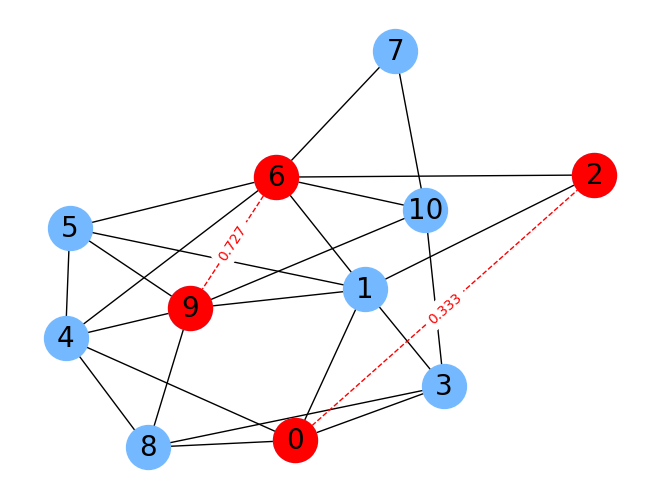

In [212]:
# Function to calculate Sorensen index two nodes
def sorensen_index(G, u, v):
    # Check if nodes exist in the graph and their degree is not zero
    if u not in G or v not in G or G.degree(u) == 0 or G.degree(v) == 0:
        print(f"Node pair ({u}, {v}) does not exist in the graph or their degree is zero.")
        return
    return 2 * len(sorted(nx.common_neighbors(G, u, v))) / (G.degree(u) + G.degree(v))

# Function to calculate Sorensen index of a list of node pairs
def calculate_sorensen_index(G, node_list):
    return ((source, target, sorensen_index(G, source, target)) for source, target in node_list if sorensen_index(G, source, target) is not None)

node_list =  [(6, 9), (0, 2)]
preds = list(calculate_sorensen_index(G, node_list))

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Hub Promoted index

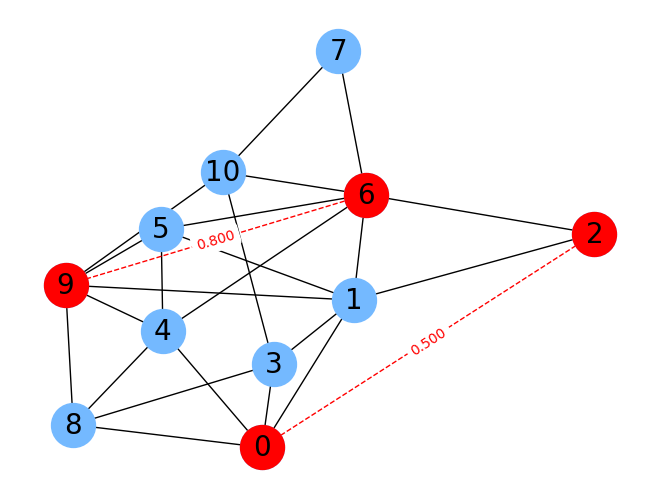

In [213]:
# Function to calculate Hub Promoted index two nodes
def hub_promoted_index(G, u, v):
    # Check if nodes exist in the graph and their degree is not zero
    if u not in G or v not in G or G.degree(u) == 0 or G.degree(v) == 0:
        print(f"Node pair ({u}, {v}) does not exist in the graph or their degree is zero.")
        return
    return len(sorted(nx.common_neighbors(G, u, v))) / min(G.degree(u), G.degree(v))

# Function to calculate Hub Promoted index of a list of node pairs
def calculate_hub_promoted_index(G, node_list):
    return ((source, target, hub_promoted_index(G, source, target)) for source, target in node_list if hub_promoted_index(G, source, target) is not None)

node_list =  [(6, 9), (0, 2)]
preds = list(calculate_hub_promoted_index(G, node_list))

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Hub Depressed Index

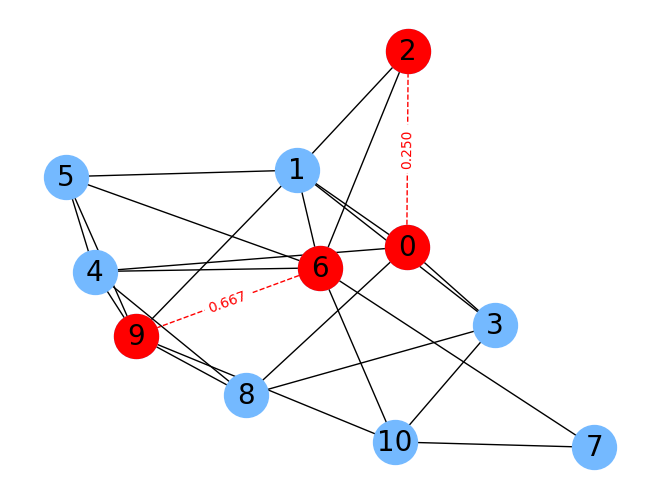

In [214]:
# Function to calculate Hub Depressed index two nodes
def hub_depressed_index(G, u, v):
    # Check if nodes exist in the graph and their degree is not zero
    if u not in G or v not in G or G.degree(u) == 0 or G.degree(v) == 0:
        print(f"Node pair ({u}, {v}) does not exist in the graph or their degree is zero.")
        return
    return len(sorted(nx.common_neighbors(G, u, v))) / max(G.degree(u), G.degree(v))

# Function to calculate Hub Depressed index of a list of node pairs
def calculate_hub_depressed_index(G, node_list):
    return ((source, target, hub_depressed_index(G, source, target)) for source, target in node_list if hub_depressed_index(G, source, target) is not None)

node_list =  [(6, 9), (0, 2)]
preds = list(calculate_hub_depressed_index(G, node_list))

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Path based

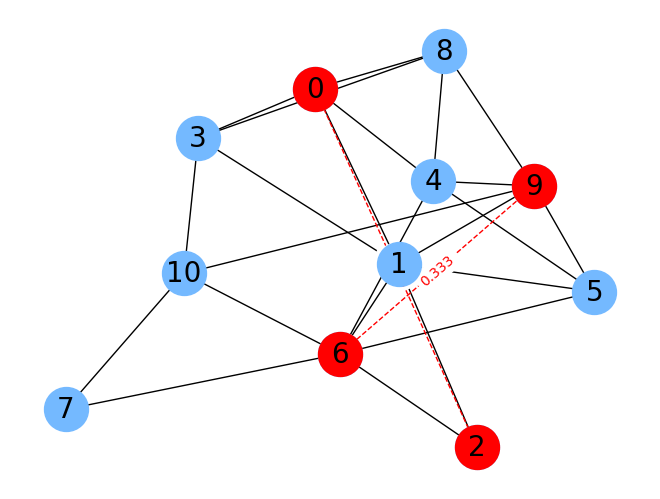

In [215]:
# Function to calculate shortest path between two nodes
def shortest_path(G, u, v):
    try:
        return nx.shortest_path_length(G, source=u, target=v)
    except nx.NetworkXNoPath:
        return 0
    
# Function to calculate path based similarity of two nodes
def path_based_similarity(G, u, v):
    # Check if nodes exist in the graph
    if u not in G or v not in G:
        print(f"Node pair ({u}, {v}) does not exist in the graph.")
        return
    return 1 / (shortest_path(G, u, v) + 1)

# Function to calculate path based similarity of a list of node pairs
def calculate_path_based_similarity(G, node_list):
    return ((source, target, path_based_similarity(G, source, target)) for source, target in node_list if path_based_similarity(G, source, target) is not None)

node_list =  [(6, 9), (0, 2)]
preds = list(calculate_path_based_similarity(G, node_list))

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Path based Hitting Time

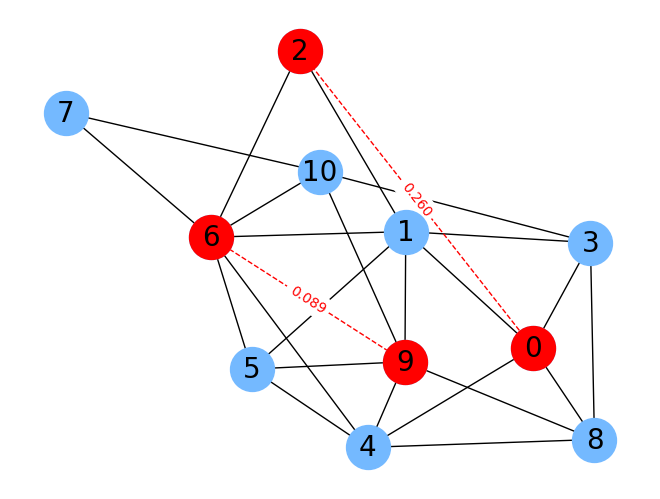

In [216]:
#Hitting Time similarity
def hitting_time_similarity(G, u, v):
    # Check if nodes exist in the graph
    if u not in G or v not in G:
        print(f"Node pair ({u}, {v}) does not exist in the graph.")
        return
    return 1 / nx.communicability(G)[u][v]

# Function to calculate hitting time similarity of a list of node pairs
def calculate_hitting_time_similarity(G, node_list):
    return ((source, target, hitting_time_similarity(G, source, target)) for source, target in node_list if hitting_time_similarity(G, source, target) is not None)

node_list =  [(6, 9), (0, 2)]
preds = list(calculate_hitting_time_similarity(G, node_list))

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# SimRank similarity

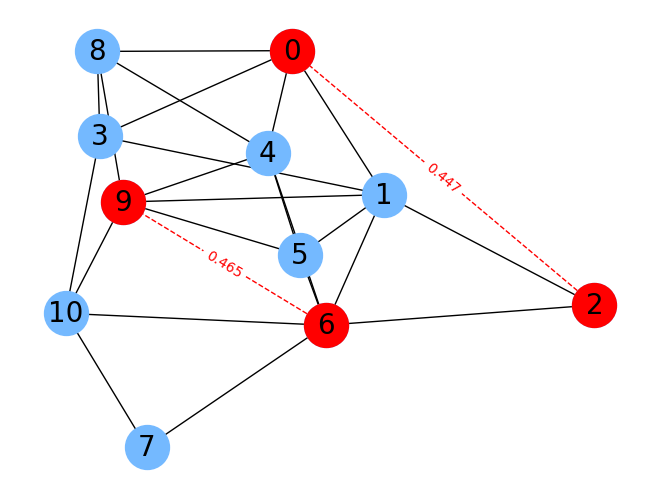

In [217]:
# Function to calculate SimRank similarity of two nodes
def simrank_similarity(G, u, v):
    # Check if nodes exist in the graph
    if u not in G or v not in G:
        print(f"Node pair ({u}, {v}) does not exist in the graph.")
        return
    return nx.simrank_similarity(G, source=u, target=v)

# Function to calculate SimRank similarity of a list of node pairs
def calculate_simrank_similarity(G, node_list):
    return ((source, target, simrank_similarity(G, source, target)) for source, target in node_list if simrank_similarity(G, source, target) is not None)

node_list =  [(6, 9), (0, 2)]
preds = list(calculate_simrank_similarity(G, node_list))

# Draw graph with coefficient edges
if preds:
    draw_coefficient_edges(G, preds)

# Large-scale graph

In [218]:
import matplotlib.pyplot as plt
import networkx as nx

# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

# Function to calculate betweenness centrality and community structure
def calculate_centrality_and_community(largest_component):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    return centrality, community_index

def draw_graph(G, largest_component, pos, centrality, community_index):
    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=True,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Biological Network", font)

# Read graph data from edgelist
G = nx.read_weighted_edgelist("data/CE-GT.txt")



SimRank similarity: 
(B0523.3, Y37D8A.23) -> 0.01136158
(F11C3.3, K12F2.1) -> 0.28301630
(C52B9.9, C44H4.3) -> 0.01235652


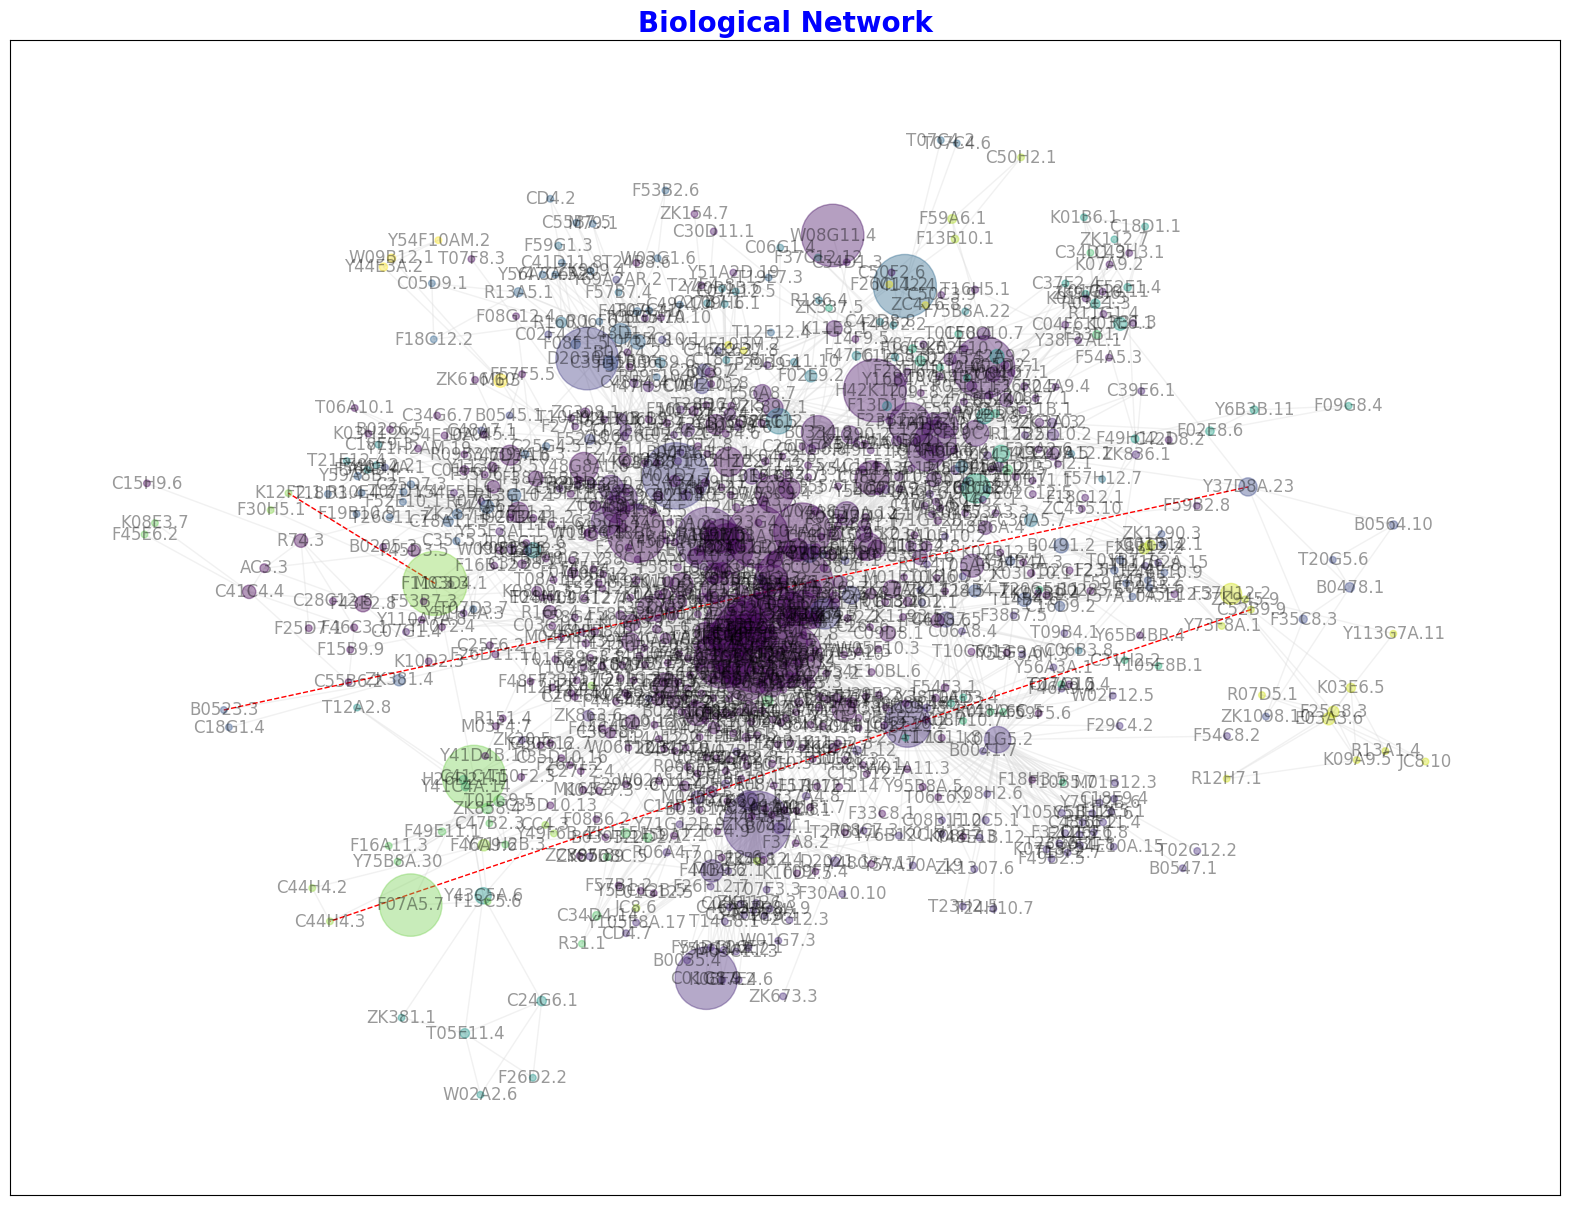

In [219]:
# Spring layout
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)

centrality, community_index = calculate_centrality_and_community(largest_component)
draw_graph(G, largest_component, pos, centrality, community_index)

node_list =  [('B0523.3', 'Y37D8A.23'), ('F11C3.3', 'K12F2.1'), ('C52B9.9', 'C44H4.3')]
preds = calculate_simrank_similarity(G, node_list)

print("SimRank similarity: ")
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

target_list = [node for edge in node_list for node in edge]

# Mark edges
nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

In [222]:
# Common neighbors
for node_pair in node_list:
    cn = sorted(nx.common_neighbors(G, node_pair[0], node_pair[1]))
    print(f"Common neighbors of {node_pair}: {cn}")


Common neighbors of ('B0523.3', 'Y37D8A.23'): []
Common neighbors of ('F11C3.3', 'K12F2.1'): ['F30H5.1']
Common neighbors of ('C52B9.9', 'C44H4.3'): []


In [223]:
# Jaccard Coefficient
def calculate_jaccard_coefficient(G, node_list):
    return list(nx.jaccard_coefficient(G, node_list))

for u, v in node_list:
    jaccard_coefficient = calculate_jaccard_coefficient(largest_component, [(u, v)])
    print(f"Jaccard Coefficient between {u} and {v}: {jaccard_coefficient}")

Jaccard Coefficient between B0523.3 and Y37D8A.23: [('B0523.3', 'Y37D8A.23', 0.0)]
Jaccard Coefficient between F11C3.3 and K12F2.1: [('F11C3.3', 'K12F2.1', 0.14285714285714285)]
Jaccard Coefficient between C52B9.9 and C44H4.3: [('C52B9.9', 'C44H4.3', 0.0)]


In [224]:
# Adamic-Adar
for u, v in node_list:
    adamic_adar = calculate_adamic_adar_index(largest_component, [(u, v)])
    print(f"Adamic-Adar Index between {u} and {v}: {adamic_adar}")

Adamic-Adar Index between B0523.3 and Y37D8A.23: [('B0523.3', 'Y37D8A.23', 0)]
Adamic-Adar Index between F11C3.3 and K12F2.1: [('F11C3.3', 'K12F2.1', 1.4426950408889634)]
Adamic-Adar Index between C52B9.9 and C44H4.3: [('C52B9.9', 'C44H4.3', 0)]


In [225]:
# Preferential Attachment
for u, v in node_list:
    preferential_attachment = calculate_preferential_attachment(largest_component, [(u, v)])
    print(f"Preferential Attachment between {u} and {v}: {preferential_attachment}")

Preferential Attachment between B0523.3 and Y37D8A.23: [('B0523.3', 'Y37D8A.23', 5)]
Preferential Attachment between F11C3.3 and K12F2.1: [('F11C3.3', 'K12F2.1', 12)]
Preferential Attachment between C52B9.9 and C44H4.3: [('C52B9.9', 'C44H4.3', 4)]


In [226]:
# Salton index
def salton_index2(G, u, v):
    # Check if nodes exist in the graph and their degree is not zero
    if u not in G or v not in G or G.degree(u) == 0 or G.degree(v) == 0:
        print(f"Node pair ({u}, {v}) does not exist in the graph or their degree is zero.")
        return
    return len(sorted(nx.common_neighbors(G, u, v))) / math.sqrt(G.degree(u) * G.degree(v))

for u, v in node_list:
    salton_index = salton_index2(largest_component, u, v)
    print(f"Salton Index between {u} and {v}: {salton_index}")

Salton Index between B0523.3 and Y37D8A.23: 0.0
Salton Index between F11C3.3 and K12F2.1: 0.2886751345948129
Salton Index between C52B9.9 and C44H4.3: 0.0


In [227]:
# Sorensen index
def sorensen_index2(G, u, v):
    # Check if nodes exist in the graph and their degree is not zero
    if u not in G or v not in G or G.degree(u) == 0 or G.degree(v) == 0:
        print(f"Node pair ({u}, {v}) does not exist in the graph or their degree is zero.")
        return
    return 2 * len(sorted(nx.common_neighbors(G, u, v))) / (G.degree(u) + G.degree(v))

for u, v in node_list:
    sorensen_index = sorensen_index2(largest_component, u, v)
    print(f"Sorensen Index between {u} and {v}: {sorensen_index}")

Sorensen Index between B0523.3 and Y37D8A.23: 0.0
Sorensen Index between F11C3.3 and K12F2.1: 0.25
Sorensen Index between C52B9.9 and C44H4.3: 0.0
